# Results of the pipeline

927


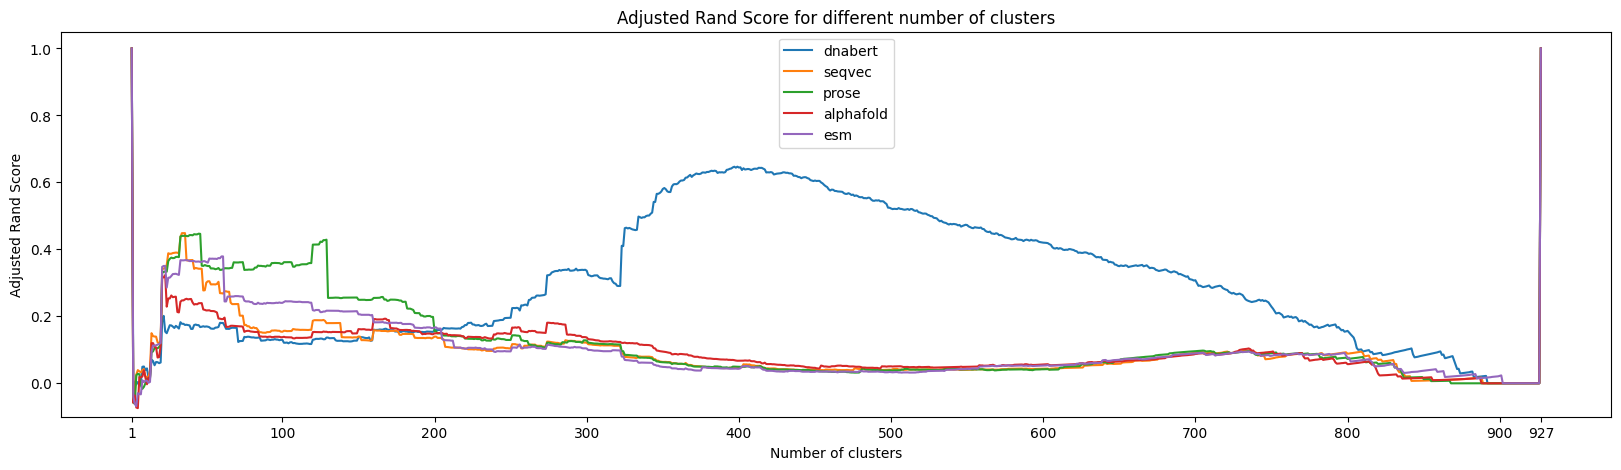

dnabert    seqvec     prose  alphafold       esm
combiner dimensional PCA                                                   
pca      10               0.428461  0.139477  0.193544   0.135928  0.231813
         50               0.470287  0.156522  0.193952   0.136851  0.208425
         all              0.472079  0.155597  0.193952   0.137013  0.210817
average  10               0.420758  0.133827  0.214888   0.130579  0.226076
         50               0.463655  0.150200  0.216105   0.134677  0.228336
         all              0.462212  0.156543  0.216105   0.136360  0.223641
sum      10               0.364129  0.142275  0.223389   0.149239  0.205068
         50               0.370945  0.156215  0.229389   0.152658  0.187574
         all              0.374169  0.155576  0.229389   0.154830  0.189619
max      10               0.433958  0.159426  0.325228   0.146591  0.239088
         50               0.532893  0.127601  0.342606   0.166338  0.192595
         all              0.603999  0.141845  0.342920   0.161471  0.194225

In [2]:
import pickle
from autoembedding.results_manager import results2table
import matplotlib.pyplot as plt
import numpy as np

PATH = '/storagenfs/m.tolloso/BioEmbedding/results/phylogenetic_results_satb2.pkl'

results = pickle.load(open(PATH, "rb"))
r, best_lst, results_dict_ars = results2table(
    results, 
    embedders= [
        "dnabert", 
        "seqvec", 
        "prose", 
        "alphafold", 
        "esm"
        ],
    combiners = ["pca", "average", "sum", "max"],
    pcas = [ '10', '50', 'all'],
    metric="mean_adjusted_rand_score", 
    
    preferred_metric_embedding="euclidean", 
    preferred_method_embedding="ward", 
    
    preferred_metric_gt="euclidean", # euclidean, average: equivalent to UPGMA when the gt is the distance matrix
    preferred_method_gt="average",
    
    preferred_edge_weight="jaccard",
    preferred_annotation="keywords"
)
# r.to_latex("./latex_output.tex")

fix, _ = plt.subplots(figsize=(20, 5))

plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score for different number of clusters")

plt.ylim(-0.1, 1.05)

X = [i for i in range(len(best_lst), 0, -1)]
print(len(best_lst))

plt.xticks([i for i in range(0, len(best_lst)+1, 100)][1:] + [1] + [len(best_lst)])

plt.plot(X, results_dict_ars['max']['all']['dnabert'], label='dnabert')
plt.plot(X, results_dict_ars['max']['10']['seqvec'], label='seqvec')
plt.plot(X, results_dict_ars['max']['all']['prose'], label='prose')
plt.plot(X, results_dict_ars['max']['all']['alphafold'], label='alphafold')
plt.plot(X, results_dict_ars['max']['10']['esm'], label='esm')
plt.legend()
plt.show()
r
# plt.savefig(Path(PATH).stem + '.eps')
